<a href="https://colab.research.google.com/github/matvb/Sudoku-Hill-Climbing/blob/main/Tarefa_4_Hill_Climbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligência Artifical
## Tarefa 4 - Hill Climbing
### Mateus de Almeida Villas Boas
### DRE: 115054675



## Imports

In [18]:
import numpy as np
import random
import math

## Implementação do algorítimo de Hill Climbing


### Preenchendo a matriz real do problema (9x9)


Esta é a matriz do problema o qual é preciso achar a solução.
<br>
<br>
Como ela é uma matriz específica, com tamanho e preenchimento inicial definidos, decidi fazer a instanciação inicial dela de maneira hard-coded.
<br>
<br>
tam_tabuleiro -> Decide o tamanho dos lados da matriz
np.zeros((tam_tabuleiro,tam_tabuleiro)) -> Cria a matriz de zeros quadrada de lado tam_tabuleiro
<br>
<br>
Depois da função preenche_fixos, todos os campos "vazios" estarão preenchidos com zero, sinalizando para as próximas funções onde poderão ser alocados os números variáveis. E os já preenchidos nessa função serão fixos até o término do programa.



<div>
<img src="https://drive.google.com/thumbnail?id=1yezhTg1ErTEjZgBPnpy4E5nGTg39xt9i&authuser=0&sz=w1423-h789" width="300"/>
</div>



In [11]:
tam_tabuleiro = 9
tabuleiro = np.zeros((tam_tabuleiro,tam_tabuleiro))
tabuleiro_original = np.copy(tabuleiro)

def preenche_fixos(tab):
  tab[0][3] = 7
  tab[1][0] = 1
  tab[2][3] = 4
  tab[2][4] = 3
  tab[2][6] = 2
  tab[3][8] = 6
  tab[4][3] = 5
  tab[4][5] = 9
  tab[5][6] = 4
  tab[5][7] = 1
  tab[5][8] = 8
  tab[6][4] = 8
  tab[6][5] = 1
  tab[7][3] = 2
  tab[7][7] = 5
  tab[8][1] = 4
  tab[8][6] = 3

  return tab

### Preenchendo uma matriz teste (4X4)




Esta é uma matriz teste consideravelmente mais fácil de se trabalhar e achar a solução do que a matriz real do problema
<br>
<br>
Toda a função de preenchimento é igual exceto pelos valores fixos e pelo valor de tam_tabuleiro


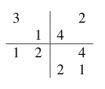

Matriz exemplo tirada do exercício 1 da lista de exercícios da semana 6


In [19]:
tam_tabuleiro = 4
tabuleiro = np.zeros((tam_tabuleiro,tam_tabuleiro))
tabuleiro_original = np.copy(tabuleiro)

def preenche_fixos(tab):
  tab[0][0] = 3
  tab[1][1] = 1
  tab[2][0] = 1
  tab[2][1] = 2
  tab[1][2] = 4
  tab[0][3] = 2
  tab[2][3] = 4
  tab[3][2] = 2
  tab[3][3] = 1

  return tab

### Preenchendo o resto dos campos com números escolhidos aleatoriamente no intervalo de números possíveis (de 1 até tam_tabuleiro)



<br>
Todos os campos considerados vazios (campos com valor 0), são preenchidos agora por um numero aleatório dentre os possíveis de acordo com o tamanho do Sudoku (entre 1 e tam_tabuleiro).
<br>
<br>
Todas as coordenadas preenchidas nesse processo são guardadas na lista "variáveis", pois serão elas as variáveis da função.
<br>
<br>
Somente os campos correspondentes as coordenadas gravadas nessa lista poderão ser mudadas no processo de Hill Climbing, fazendo com os números que foram preenchidos anteriormente permanecam fixos.

In [20]:
def preenche_iniciais(tab):
  variaveis = []
  for i,row in enumerate(tab):
    for j,value in enumerate(row):
      if value == 0:
        variaveis.append((i,j))
        tab[i][j] = random.randint(1, tam_tabuleiro)

  return tab, variaveis

### Função objetivo

<br>
O valor retornado pela função objetivo é o número de casas erradas no tabuleiro. É uma função de minimização visto que o objetivo final é ter um tabuleiro em que a quantidade de casas erradas seja 0.
<br>
<br>
A função acha esse número percorrendo o tabuleiro e cada vez que um número se repete em uma mesma linha, coluna ou bloco é somado 1.
<br>
<br>
Se uma linha tiver três casas com o número 5 e duas casas com o número 7. A função somará 3 ao total. Porque existem dois número 5 errados e um número 7 errado nesta fileira.
<br>
<br>
Faz-se a mesma coisa para todas as fileiras, colunas e blocos e tem-se o valor total da função que é retornado.



In [21]:
def somas(tab):
  soma_col = 0
  soma_row = 0
  soma_bloco = 0

  # Calcula o somatório da diferença da soma de cada linha e coluna em relação a soma certa.
  for i, row in enumerate(tab):
    aux_row = 0
    aux_col = 0
    aux_row2 = []
    aux_col2 = []
    for j, value in enumerate(row):
      if value in aux_row2:
        aux_row += 1
      aux_row2.append(value)
      if tab[j][i] in aux_col2:
        aux_col += 1
      aux_col2.append(tab[j][i])

    soma_row += aux_row
    soma_col += aux_col

  # Calcula o somatório da diferença da soma de cada bloco interno em relação a soma certa.
  tam_bloco = int(math.sqrt(tam_tabuleiro))
  quant_blocos = (tam_tabuleiro**2)/(tam_bloco**2)
  for bloco1 in range(tam_bloco):
    for bloco2 in range(tam_bloco):
      aux_bloco = 0
      aux_bloco2 = []
      for i in range(tam_bloco):
        for j in range(tam_bloco):
          if tab[i+(tam_bloco*bloco1)][j+(tam_bloco*bloco2)] in aux_bloco2:
            aux_bloco += 1
          aux_bloco2.append(tab[i+(tam_bloco*bloco1)][j+(tam_bloco*bloco2)])

      soma_bloco += aux_bloco

  # Soma os calculos anterios para linhas, colunas e blocos para ter o valor da função para o tabuleiro todo.
  
  soma_total= soma_row + soma_col + soma_bloco
  return soma_total

### Hill Climbing:

A função Hill Climbing utiliza a função somas() e a lista "variaveis" para calcular ao valor da função do tabuleiro com uma variável alterada por vez e vai sempre guardando o tabuleiro e o valor da função que tiver a soma mínima.
<br>
E ao achar a possibilidade mínima, entra recursivamente na função com o tabuleiro de soma mínima.
<br>
<br>
Quando a função começa a andar de lado, ou seja, quando qualquer alteração não diminui o valor da função para um valor menor do que o tabuleiro atual, a função para e retorna o tabuleiro e o valor da função do tabuleiro final.


In [22]:
def hill_climbing(tabuleiro, variaveis, soma_min, qtd_iteracoes):
  soma_min_anterior = soma_min
  for num in range(tam_tabuleiro):
    for variavel in variaveis:
      i = variavel[0]
      j = variavel[1]
      tabuleiro_aux = np.copy(tabuleiro)
      if tabuleiro_aux[i][j] != i+1:
        tabuleiro_aux[i][j] = i+1
        soma_atual = somas(tabuleiro_aux)
        if soma_min > soma_atual:
          coordenada_mudada = (i,j)
          soma_min = soma_atual
          tabuleiro_min = tabuleiro_aux
    
    if soma_min_anterior == soma_min:
      return tabuleiro, soma_min, qtd_iteracoes
    else:
      qtd_iteracoes += 1
      print("\n")
      print(tabuleiro_min)
      print("Coordenada mudada:",coordenada_mudada)
      print("valor da função:",soma_min)
      return hill_climbing(tabuleiro_min, variaveis, soma_min, qtd_iteracoes)

### Execução e prints:

Implementei a possibilidade de rodar o algorítimo uma quantidade limitada de vez escolhida através da variável num_repetições e também a possibilidade de rodar o algorítimo até conseguir achar uma solução ótima (soma_min_hill == 0)
<br>
<br>
Ambos os métodos geram prints mostrando o tabuleiro inicial, apenas com os valores fixos e em seguida uma sequencia de tabuleiros gerados aleatoriamente (Tabuleiro aleatorio da vez) com suas respectivas melhores respostas obtivas através das funções (Tabuleiro final dessa tentativa)
<br>
<br>
É contabilizado também qual repetição de execução atual, através da variável vezes, e o valor da função no tabuleiro final de cada tentativa

In [23]:
tabuleiro_original = preenche_fixos(tabuleiro_original)
print("Tabuleiro inicial:")
print(tabuleiro_original)
print("\n")

Tabuleiro inicial:
[[3. 0. 0. 2.]
 [0. 1. 4. 0.]
 [1. 2. 0. 4.]
 [0. 0. 2. 1.]]




In [24]:
# Parâmetros para colorir e formatar o print dos textos
CBOLD     = '\33[1m'
CRED = '\033[91m'
CGREEN  = '\33[92m'
CBLUE   = '\33[34m'
CEND = '\033[0m'

# É a execução padrão usada de base para os diferentes métodos de parada.
def tentativa_completa(vez, valor_inicial, num_iteracoes, valor_final):
  tabuleiro = np.copy(tabuleiro_original)
  tabuleiro = preenche_fixos(tabuleiro)
  tabuleiro, variaveis = preenche_iniciais(tabuleiro)

  print("\n")
  print(CRED + CBOLD + "TABULEIRO ALEATÓRIO DA VEZ:", vez, CEND)
  print(tabuleiro)
  valor_tab_inicial = somas(tabuleiro)
  print("Valor inicial da função:", valor_tab_inicial)
  

  tabuleiro_hill, soma_min_hill, qtd_iteracoes = hill_climbing(tabuleiro, variaveis, valor_tab_inicial, 0)
  print("\n")
  print(CGREEN + CBOLD + "TABULEIRO FINAL DESSA TENTATIVA:", CEND)
  print(tabuleiro_hill)
  print("Valor da função:", soma_min_hill)
  
  valor_inicial.append(valor_tab_inicial)
  valor_final.append(soma_min_hill)
  num_iteracoes.append(qtd_iteracoes)

  return valor_inicial, num_iteracoes, valor_final

# Calcula a média e o desvio padrão dos valores de uma lista dada
def media_desvio_padrao(lista):
  media = sum(lista) / len(lista) 
  variance = sum([((x - media) ** 2) for x in lista]) / len(lista) 
  dp = variance ** 0.5

  return media, dp
  

# Rodar um numero fixo de vezes
def roda_fixo(num_repeticoes):
  valor_inicial = []
  num_iteracoes = []
  valor_final = []

  for repeticao in range(num_repeticoes):
    valor_i, num_it, valor_f = tentativa_completa(repeticao + 1, valor_inicial, num_iteracoes, valor_final)
    valor_inicial = valor_i
    num_iteracoe = num_it
    valor_final = valor_f


  media_v_inicial, dp_v_inicial = media_desvio_padrao(valor_inicial)
  media_v_final, dp_v_final = media_desvio_padrao(valor_final)
  media_qtd_ite, dp_qtd_ite = media_desvio_padrao(num_iteracoes)

  print("\n")
  print(CBLUE + CBOLD + "Média dos valores dos tabuleiros aleatórios iniciais:", media_v_inicial, CEND)
  print(CBLUE + CBOLD + "Desvio padrão:", dp_v_inicial, CEND, "\n")

  print(CBLUE + CBOLD + "Média dos valores dos tabuleiros finais das tentativas:", media_v_final, CEND)
  print(CBLUE + CBOLD + "Desvio padrão:", dp_v_final, CEND, "\n")

  print(CBLUE + CBOLD + "Média da quantidade de iterações em cada tentativa:", media_qtd_ite, CEND)
  print(CBLUE + CBOLD + "Desvio padrão:", dp_qtd_ite, CEND, "\n")




# Rodar até achar a solução ótima
def ate_solucao_otima():
  vezes = 1
  
  valor_inicial = []
  num_iteracoes = []
  valor_final = []

  valor_i, num_it, valor_f = tentativa_completa(vezes, valor_inicial, num_iteracoes, valor_final)
  valor_inicial = valor_i
  num_iteracoe = num_it
  valor_final = valor_f

  while(valor_final[-1] != 0):
    vezes += 1
    valor_i, num_it, valor_f = tentativa_completa(vezes, valor_inicial, num_iteracoes, valor_final)
    valor_inicial = valor_i
    num_iteracoe = num_it
    valor_final = valor_f

  print("\n")
  print(CBLUE + CBOLD + "Tentativas até achar a solução:", vezes, CEND)

  media_v_inicial, dp_v_inicial = media_desvio_padrao(valor_inicial)
  media_v_final, dp_v_final = media_desvio_padrao(valor_final)
  media_qtd_ite, dp_qtd_ite = media_desvio_padrao(num_iteracoes)

  print("\n")
  print(CBLUE + CBOLD + "Média dos valores dos tabuleiros aleatórios iniciais:", media_v_inicial, CEND)
  print(CBLUE + CBOLD + "Desvio padrão:", dp_v_inicial, CEND, "\n")

  print(CBLUE + CBOLD + "Média dos valores dos tabuleiros finais das tentativas:", media_v_final, CEND)
  print(CBLUE + CBOLD + "Desvio padrão:", dp_v_final, CEND, "\n")

  print(CBLUE + CBOLD + "Média da quantidade de iterações em cada tentativa:", media_qtd_ite, CEND)
  print(CBLUE + CBOLD + "Desvio padrão:", dp_qtd_ite, CEND, "\n")

  return vezes


#Rodar até achar a solução ótima um número fixo de vezes para achar a média de vezes necessária para se achar a solução ótima
def roda_fixo_ate_solucao_otima(num_repeticoes):
  soma_vezes = 0
  for i in range(num_repeticoes):
    soma_vezes += ate_solucao_otima()

  soma_vezes = soma_vezes/num_repeticoes
  print(CRED + CBOLD +"Média de numero de vezes necessárias para se achar a solução ótima com ",num_repeticoes, "repetições:", soma_vezes, CEND)



#### Rodar um número fixo de vezes
O programa utiliza um loop-for para rodar um número definido de tentativas de tabuleiros iniciais aleatórios apenas, mesmo que a solução ótima não seja encontrada.


In [25]:
roda_fixo(1000)

Streaming output truncated to the last 5000 lines.
 [1. 2. 3. 4.]
 [3. 4. 2. 1.]]
Coordenada mudada: (2, 2)
valor da função: 7


TABULEIRO FINAL DESSA TENTATIVA: 
[[3. 1. 3. 2.]
 [2. 1. 4. 1.]
 [1. 2. 3. 4.]
 [3. 4. 2. 1.]]
Valor da função: 7


TABULEIRO ALEATÓRIO DA VEZ: 877 
[[3. 4. 4. 2.]
 [1. 1. 4. 1.]
 [1. 2. 1. 4.]
 [3. 1. 2. 1.]]
Valor inicial da função: 14


[[3. 4. 4. 2.]
 [2. 1. 4. 1.]
 [1. 2. 1. 4.]
 [3. 1. 2. 1.]]
Coordenada mudada: (1, 0)
valor da função: 11


[[3. 4. 4. 2.]
 [2. 1. 4. 1.]
 [1. 2. 3. 4.]
 [3. 1. 2. 1.]]
Coordenada mudada: (2, 2)
valor da função: 9


[[3. 4. 1. 2.]
 [2. 1. 4. 1.]
 [1. 2. 3. 4.]
 [3. 1. 2. 1.]]
Coordenada mudada: (0, 2)
valor da função: 7


[[3. 4. 1. 2.]
 [2. 1. 4. 1.]
 [1. 2. 3. 4.]
 [3. 4. 2. 1.]]
Coordenada mudada: (3, 1)
valor da função: 5


TABULEIRO FINAL DESSA TENTATIVA: 
[[3. 4. 1. 2.]
 [2. 1. 4. 1.]
 [1. 2. 3. 4.]
 [3. 4. 2. 1.]]
Valor da função: 5


TABULEIRO ALEATÓRIO DA VEZ: 878 
[[3. 2. 2. 2.]
 [4. 1. 4. 4.]
 [1. 2. 4. 4.]
 [2.

#### Rodar até achar a solução ótima
O programa utiliza a estrutura <i>while</i> rodar tentativas de tabuleiros iniciais aleatórios até que a solução ótima seja encontrada (pode rodar infinitamente ou por muito tempo)

In [74]:
ate_solucao_otima()



TABULEIRO ALEATÓRIO DA VEZ: 1 
[[3. 3. 2. 2.]
 [4. 1. 4. 2.]
 [1. 2. 4. 4.]
 [2. 4. 2. 1.]]
Valor inicial da função: 13


[[3. 3. 1. 2.]
 [4. 1. 4. 2.]
 [1. 2. 4. 4.]
 [2. 4. 2. 1.]]
Coordenada mudada: (0, 2)
valor da função: 10


[[3. 3. 1. 2.]
 [4. 1. 4. 2.]
 [1. 2. 3. 4.]
 [2. 4. 2. 1.]]
Coordenada mudada: (2, 2)
valor da função: 7


TABULEIRO FINAL DESSA TENTATIVA: 
[[3. 3. 1. 2.]
 [4. 1. 4. 2.]
 [1. 2. 3. 4.]
 [2. 4. 2. 1.]]
Valor da função: 7


TABULEIRO ALEATÓRIO DA VEZ: 2 
[[3. 3. 4. 2.]
 [4. 1. 4. 3.]
 [1. 2. 3. 4.]
 [1. 2. 2. 1.]]
Valor inicial da função: 11


[[3. 3. 4. 2.]
 [4. 1. 4. 3.]
 [1. 2. 3. 4.]
 [1. 4. 2. 1.]]
Coordenada mudada: (3, 1)
valor da função: 8


[[3. 3. 1. 2.]
 [4. 1. 4. 3.]
 [1. 2. 3. 4.]
 [1. 4. 2. 1.]]
Coordenada mudada: (0, 2)
valor da função: 6


[[3. 3. 1. 2.]
 [2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [1. 4. 2. 1.]]
Coordenada mudada: (1, 0)
valor da função: 5


[[3. 3. 1. 2.]
 [2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 4. 2. 1.]]
Coordenada mudada: (3, 0)
valor da f

10

#### Rodar até achar a solução ótima um número fixo de vezes
Um loop de tamanho fixo definido da função anterior, e assim da mesma maneira o algoritmo pode rodar infinitamente ou por muito tempo.
Utilizado para obter-se uma média de vezes necessárias para se rodar o algorítmo até se achar uma solução ótima.
<br>
<br>
A mesma estrutura de while usada na versão em que o algoritmo roda até achar a solução ótima, agora é colocado dentre de um loop-for para rodar um número fixo de vezes.
<br>
<br>
Somando a quantidade de vezes repetidas para se achar a solução ótima e dividindo o resultado pelo número de repetições do loop-for, obtem-se a média desejada.

In [8]:
roda_fixo_ate_solucao_otima(1000)

Streaming output truncated to the last 5000 lines.
TABULEIRO ALEATÓRIO DA VEZ: 61 
[[3. 1. 1. 2.]
 [3. 1. 4. 1.]
 [1. 2. 4. 4.]
 [2. 4. 2. 1.]]
Valor inicial da função: 13


[[3. 1. 1. 2.]
 [3. 1. 4. 1.]
 [1. 2. 3. 4.]
 [2. 4. 2. 1.]]
Coordenada mudada: (2, 2)
valor da função: 10


[[3. 1. 1. 2.]
 [2. 1. 4. 1.]
 [1. 2. 3. 4.]
 [2. 4. 2. 1.]]
Coordenada mudada: (1, 0)
valor da função: 9


[[3. 1. 1. 2.]
 [2. 1. 4. 1.]
 [1. 2. 3. 4.]
 [4. 4. 2. 1.]]
Coordenada mudada: (3, 0)
valor da função: 8


TABULEIRO FINAL DESSA TENTATIVA: 
[[3. 1. 1. 2.]
 [2. 1. 4. 1.]
 [1. 2. 3. 4.]
 [4. 4. 2. 1.]]
Valor da função: 8


TABULEIRO ALEATÓRIO DA VEZ: 62 
[[3. 3. 4. 2.]
 [4. 1. 4. 3.]
 [1. 2. 4. 4.]
 [4. 3. 2. 1.]]
Valor inicial da função: 10


[[3. 3. 4. 2.]
 [4. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]]
Coordenada mudada: (2, 2)
valor da função: 7


[[3. 3. 1. 2.]
 [4. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]]
Coordenada mudada: (0, 2)
valor da função: 5


[[3. 3. 1. 2.]
 [2. 1. 4. 3.]
 [1. 2. 3. 4.]
 

## Análisando a implementação e os resultados

### Implementação

#### <b>Representação da Matriz</b>

Para representar o tabuleiro de Sudoku eu fiz uma matriz usando a biblioteca Numpy do Python.
Primeiramente definindo um tamanho do lado do tabuleiro
<br>
<br>
<i>Ex: tam_tabuleiro = 9</i>
<br>
<br>
E em seguida, como todo tabuleiro tem que ser quadrado, criei uma matriz de tamanho <b>tam_tabuleiro</b> por <b>tam_tabuleiro</b>
<br>
<br>
tabuleiro = np.zeros((tam_tabuleiro,tam_tabuleiro))
<br>
<br>
Isso cria uma matriz do tamanho desejado toda preenchida com zeros. Os zeros nesse caso representam campos ainda não preenchidos pois não existe o valor zero nos campos de um tabuleiro de Sudoku.
<br>
Após a criação da matriz no formato correto é necessário apenas rodar a função preenche_fixos(), que preenche todos os valores fixos hardcoded pelo enunciado do programa, e a matriz está pronta.
<br>
<br> 
#### <b>Duas funções objetivo</b>

##### <b>Funções objetivo antiga</b>
Ao pensar em que função usar parar ser minimizada ou maximizada pela algoritmo Hill Climbing, eu lembrei de um paper que eu tinha lido rapidamente sobre Hill Climbing dias antes.
<br>
<a href="https://iugspace.iugaza.edu.ps/bitstream/handle/20.500.12358/25136/Alijla%2C%20Basem%20O_5.pdf?sequence=1&isAllowed=y">
Paper "ß-Hill Climbing algorithm for sudoku game"
</a>
<br>
<br>
![Função antiga](https://i.imgur.com/4L5tnBn.png)

<br>
Me baseando nesse trecho, defini o valor da minha função objetivo como o somatório da diferença da soma do valor de cada linha, coluna e bloco em relação a soma real que deveria dar em um Sudoku correto.
<br>
<br>
Consegui fazer a implementação correta, mas após a apresentação do código em sala de aula percebi que existe a possibilidade de essa função objetivo gerar um "falso positivo", ou seja, definir um tabuleiro como tendo o valor 0 mesmo que esse tabuleiro não seja um tabuleiro de Sudoku válido e tenha repetições na linha, coluna ou blocos.
<br>
<br>
Ex:
<br>

![Tabuleiro com erro](https://i.imgur.com/SnV2Bvf.jpg)

<br>
No tabuleiro acima todas as linhas, colunas e blocos somam 45 como deveriam somar, mas existem muitos números que se repetem nas suas devidas linhas colunas e blocos também (marcados em vermelho). Pela minha função objetiva antiga esse tabuleiro seria considerado válido mesmo tendo a maioria de seus valores errados.

<br>
<br>

##### <b>Funções objetivo nova</b>
Depois de perceber o erro fiz uma nova versão da função objetivo que não retorna falsos positivos e também é mais simples de entender e de implementar.
<br>
<br>
Do mesmo modo que a função antiga, cada linha, coluna e bloco são percorridos, mas desta vez é contabilizado a número de casas com o número errado. Ou seja o número excedente de mesmos algarismos em cada linha, coluna e bloco.
<br>
<br>
Na nova função implementada se uma linha tiver três casas com o número 5 e duas casas com o número 7. A função somará 3 ao total. Porque existem dois número 5 errados e um número 7 errado nesta fileira.
<br>
<br>
Faz-se a mesma coisa para todas as fileiras, colunas e blocos e tem-se o valor total da função que é retornado.
<br>
Desta forma a função objetivo continua sendo uma função de minimização. Visto que o objetivo final é ter um tabuleiro em que a quantidade de casas erradas seja 0.
<br>
<br>

##### <b>Três métodos de rodar o algorítmo</b>
Desenvolvi três diferentes jeitos de rodar o mesmo algortimo Hill-Climbing. A única diferença entre eles é a quantidade de tentativas que cada um faz. Cada maneira é indicada para um tipo de teste e pode ser rodada individualmente nos blocos de código acima.
<br>
<br>

<b>- Rodar um número fixo de vezes</b>
<br>
<b>roda_fixo()</b>
<br>
O programa utiliza um loop-for para rodar um número definido de tentativas de tabuleiros iniciais aleatórios apenas, mesmo que a solução ótima não seja encontrada.

<b>- Rodar até achar a solução ótima</b>
<br>
<b>ate_solucao_otima()</b>
<br>
O programa utiliza a estrutura <i>while</i> rodar tentativas de tabuleiros iniciais aleatórios até que a solução ótima seja encontrada (pode rodar infinitamente ou por muito tempo)


<b>- Rodar até achar a solução ótima um número fixo de vezes</b>
<br>
<b>roda_fixo_ate_solucao_otima()</b>
<br>
Um loop de tamanho fixo definido da função anterior, e assim da mesma maneira o algoritmo pode rodar infinitamente ou por muito tempo.
Utilizado para obter-se uma média de vezes necessárias para se rodar o algorítmo até se achar uma solução ótima.
<br>
A mesma estrutura de while usada na versão em que o algoritmo roda até achar a solução ótima, agora é colocado dentre de um loop-for para rodar um número fixo de vezes.
<br>
Somando a quantidade de vezes repetidas para se achar a solução ótima e dividindo o resultado pelo número de repetições do loop-for, obtem-se a média desejada.
<br>
<br>
<b>Média e Desvio Padrão</b>
<br>
A função media_desvio_padrao(lista) foi incorporada em todos os três métodos para ao final das repetições, o programa mostra a média e o desvio padrão dos tabuleiros iniciais utilizados, do número de iterações até se chegar à solução ou à um plateau, e do valor final dos tabuleiros.
<br>
<br>
Na seção abaixo analisarei os resultados usando as diferentes maneiras de rodar o algoritmo de Hill-Climbing





### Resultados

#### <b>Matriz 4X4</b>

- Rodando a função <b>ate_solucao_otima()</b> com a matriz 4X4, consistentemente o programa consegue obter o resultade ótimo esperado. E de maneira rápida, quase instantânea.
<br>
<br>
- Utilizando a função <b>roda_fixo_ate_solucao_otima()</b> com o número de repetições definido como 1000, obtemos uma solução numérica de valor <b>66.279</b>.
<br>
<br>
Esse número representa a quantidade média de tentativas de usar um novo tabuleiro aleatório para se chegar na solução ótima. Ou seja, em média, para essa matriz 4X4, o programa precisa em média gerar 66.279 matrizes inciais aleatórias para que seja obtido a solução inicial.
<br>
O <i>while</i> que roda o algortimo até achar a solução ótima foi rodado 1000 vezes para se obter essa média. O tempo de execução até o resultado foi por volta de 8 minutos.
<br>
<br>
- Utilizando a função <b>roda_fixo()</b> com o número de repetições definido como 1000, obtemos as seguinde médias e desvios padrão:
<br>
<br>
Média dos valores dos tabuleiros aleatórios iniciais: <b>12.394</b>
<br>
Desvio padrão: <b>2.6337737184503838</b>
<br>
<br>
Média dos valores dos tabuleiros finais das tentativas: <b>5.813</b>
<br>
Desvio padrão: <b>1.870836978467121</b>
<br>
<br>
Média da quantidade de iterações em cada tentativa: <b>3.073</b>
<br>
Desvio padrão: <b>1.0166961197919455</b>
<br>
<br>


#### <b>Matriz 9X9</b>

- Para a matriz 9X9 do problema original, a solução é bem mais dificil. A função <b>ate_solucao_otima()</b> foi deixado rodando por um longo tempo, mais de uma hora. Nesse tempo foram testadas mais de 15.000 de configurações iniciais aleatórias diferentes e mesmo assim nunca obteve-se o retorno de uma solução ótima.
<br>
<br>
- Apesar de não ser possível utilizar a função <b>roda_fixo_ate_solucao_otima()</b> para obter uma média de tentativas até ser achada a solução ótima, pois ela nunca é achada pello algoritmo, é possível utilizar <b>roda_fixo()</b> para calcular as médias e desvios padrão.
<br>
<br>
- Utilizando a função <b>roda_fixo()</b> com novamente o número de repetições definido como 1000, obtemos as seguinde médias e desvios padrão para a matrix 9X9:
<br>
<br>
Média dos valores dos tabuleiros aleatórios iniciais: <b>82.246 </b>
<br>
Desvio padrão: <b>5.128302253182827  </b>
<br>
<br>
Média dos valores dos tabuleiros finais das tentativas: <b>66.761 </b>
<br>
Desvio padrão: <b>4.448806469155525 </b>
<br>
<br>
Média da quantidade de iterações em cada tentativa: <b>10.112 </b>
<br>
Desvio padrão: <b>2.3433855850030323  </b>
<br>
<br>



A conclusão chegada é que o método de Hill Climbing não é o mais indicado para este caso específico de problema. O tabuleiro do problema só pode ser resolvido pelo método de Hill Climbing com uma configuração inicial específica, e por ter uma grande quantidade de variáveis aleatoriamente definidas envolvidas, é muito demorado chegar na configuração necessária para resolver o problema.
<br>
<br>
Para tabuleiros mais simples, menores ou com menos valores variáveis o algoritmo Hill Climbing pode ter a possibilidade de achar soluções rapidamente para o problema, como visto quando rodado com a matriz 4X4 de exemplo.
<br>
<br>
Depende da análise caso-a-caso da complexidade, e do tempo e poder computacional que se tem à disposição, para saber se um algoritmo de Hill Climbing deve ou não ser usado para um dado tabuleiro de Sudoku.